# Story 1: Infrastructure Investment & Jobs Act Funding Allocation

Your story (Data Visualization(s) ) should address the following questions:

* Is the allocation equitable based on the population of each of the States and Territories, or is bias apparent?

* Does the allocation favor the political interests of the Biden administration?

Notes:

1. You will need to source data on the current (estimated) population of each of the States and Territories (accuracy is more important than precision) and on the official election results of the 2020 Presidential election.

2. You may choose to develop you visualizations using a desktop application or a code library. Your submittal should be in the form of a report (document) or a presentation.

3. This assignment is due by the end of week two of the semester.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [72]:
# read in data 
df_main = pd.read_excel("data_files/IIJA FUNDING AS OF MARCH 2023(1).xlsx")
df_state_pop = pd.read_csv("data_files/us_pop_by_state.csv")
df_popular_vote = pd.read_csv("data_files/Popular vote backend - Sheet1.csv")

In [73]:
def show_summary(df) :
    
    print(80 * "+")
    print(f"DIMENSIONS : ({df.shape[0]}, {df.shape[1]})")
    
    print(80 * "+")
    print("COLUMNS: \n")
    print(df.columns.values)
    
    print(80 * "+")
    print("DATA INFO: \n")
    print(df.dtypes)
    
    print(80 * "+")
    print("MISSING VALUES: \n")
    print(df.isnull().sum())
    
    print(80 * "+")
    print("NUMBER OF UNIQUE VALUES: \n")
    print(df.nunique())

## Data Wrangling

In [74]:
df_popular_vote["state"] = df_popular_vote["state"].str.upper()
df_popular_vote = df_popular_vote.loc[4:, ["state", "dem_votes", "rep_votes"]]
df_popular_vote = df_popular_vote.set_index("state")
df_popular_vote = df_popular_vote.drop(["MAINE 1ST DISTRICT", "MAINE 2ND DISTRICT", "NEBRASKA 1ST DISTRICT", "NEBRASKA 2ND DISTRICT", "NEBRASKA 3RD DISTRICT", "NON-BATTLEGROUNDS"])

df_state_pop["state"] = df_state_pop["state"].str.upper()
df_state_pop = df_state_pop.loc[:, ["state", "2020_census"]]
df_state_pop["state"] = df_state_pop["state"].replace("DC", "DISTRICT OF COLUMBIA")


In [75]:
# merge dfs 
merge_df = pd.merge(df_main, df_state_pop, how = "left", left_on = "State, Teritory or Tribal Nation", right_on = "state")
merge_df.loc[merge_df["State, Teritory or Tribal Nation"] == "DELEWARE", "2020_census"] = 989948
merge_df.loc[merge_df["State, Teritory or Tribal Nation"] == "AMERICAN SAMOA", "2020_census"] = 49710
merge_df.loc[merge_df["State, Teritory or Tribal Nation"] == "NORTHERN MARIANA ISLANDS", "2020_census"] = 47329
merge_df.loc[merge_df["State, Teritory or Tribal Nation"] == "GUAM", "2020_census"] = 153836
merge_df.loc[merge_df["State, Teritory or Tribal Nation"] == "US VIRGIN ISLANDS", "2020_census"] = 87146
merge_df.loc[merge_df["State, Teritory or Tribal Nation"] == "TRIBAL COMMUNITIES", "2020_census"] = 6790000
merge_df.loc[merge_df["State, Teritory or Tribal Nation"] == "DELAWARE", "2020_census"] = 3221789

merge_df = merge_df.drop("state", axis = 1)

merge_df = pd.merge(merge_df, df_popular_vote, how = "left", left_on = "State, Teritory or Tribal Nation", right_on = "state")
merge_df.loc[merge_df["State, Teritory or Tribal Nation"] == "DELEWARE", "dem_votes"] = 296368
merge_df.loc[merge_df["State, Teritory or Tribal Nation"] == "DELEWARE", "rep_votes"] = 200603

merge_df = merge_df.rename(columns={"2020_census" : "Population"})

In [76]:
merge_df["dem_votes"] = merge_df["dem_votes"].str.replace(',', '')
merge_df["rep_votes"] = merge_df["rep_votes"].str.replace(',', '')

merge_df["dem_votes"] = merge_df["dem_votes"].fillna(0)
merge_df["rep_votes"] = merge_df["rep_votes"].fillna(0)

merge_df["dem_votes"] = merge_df["dem_votes"].astype(int)
merge_df["rep_votes"] = merge_df["rep_votes"].astype(int)

In [77]:
merge_df["Red or Blue State"] = merge_df.apply(lambda row: "Red" if row["rep_votes"] > row["dem_votes"] else ("Blue" if row["rep_votes"] < row["dem_votes"] else "Blue"), axis = 1)


In [78]:
show_summary(merge_df)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DIMENSIONS : (57, 6)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
COLUMNS: 

['State, Teritory or Tribal Nation' 'Total (Billions)' 'Population'
 'dem_votes' 'rep_votes' 'Red or Blue State']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DATA INFO: 

State, Teritory or Tribal Nation     object
Total (Billions)                    float64
Population                          float64
dem_votes                             int32
rep_votes                             int32
Red or Blue State                    object
dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MISSING VALUES: 

State, Teritory or Tribal Nation    0
Total (Billions)                    0
Population                          1
dem_votes                           0
rep_votes                           0
Red or Blue State              

# Visualizations

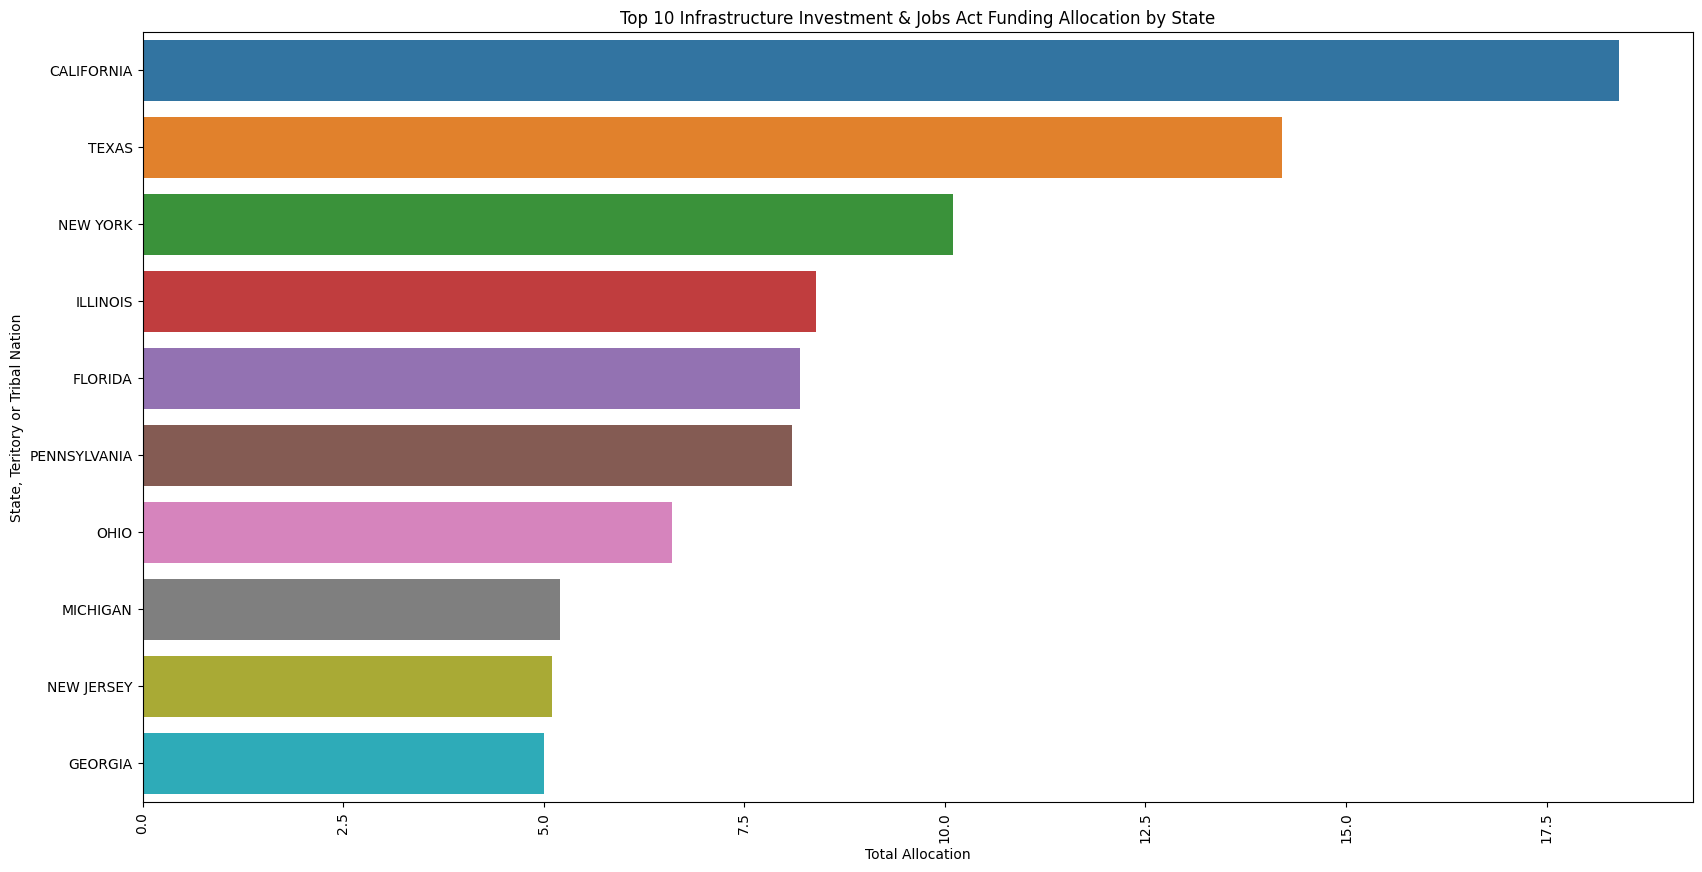

In [79]:
sorted_df = merge_df.sort_values('Total (Billions)', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(y='State, Teritory or Tribal Nation', x='Total (Billions)', data=sorted_df.head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Infrastructure Investment & Jobs Act Funding Allocation by State')
plt.ylabel('State, Teritory or Tribal Nation')
plt.xlabel('Total Allocation')
plt.show()

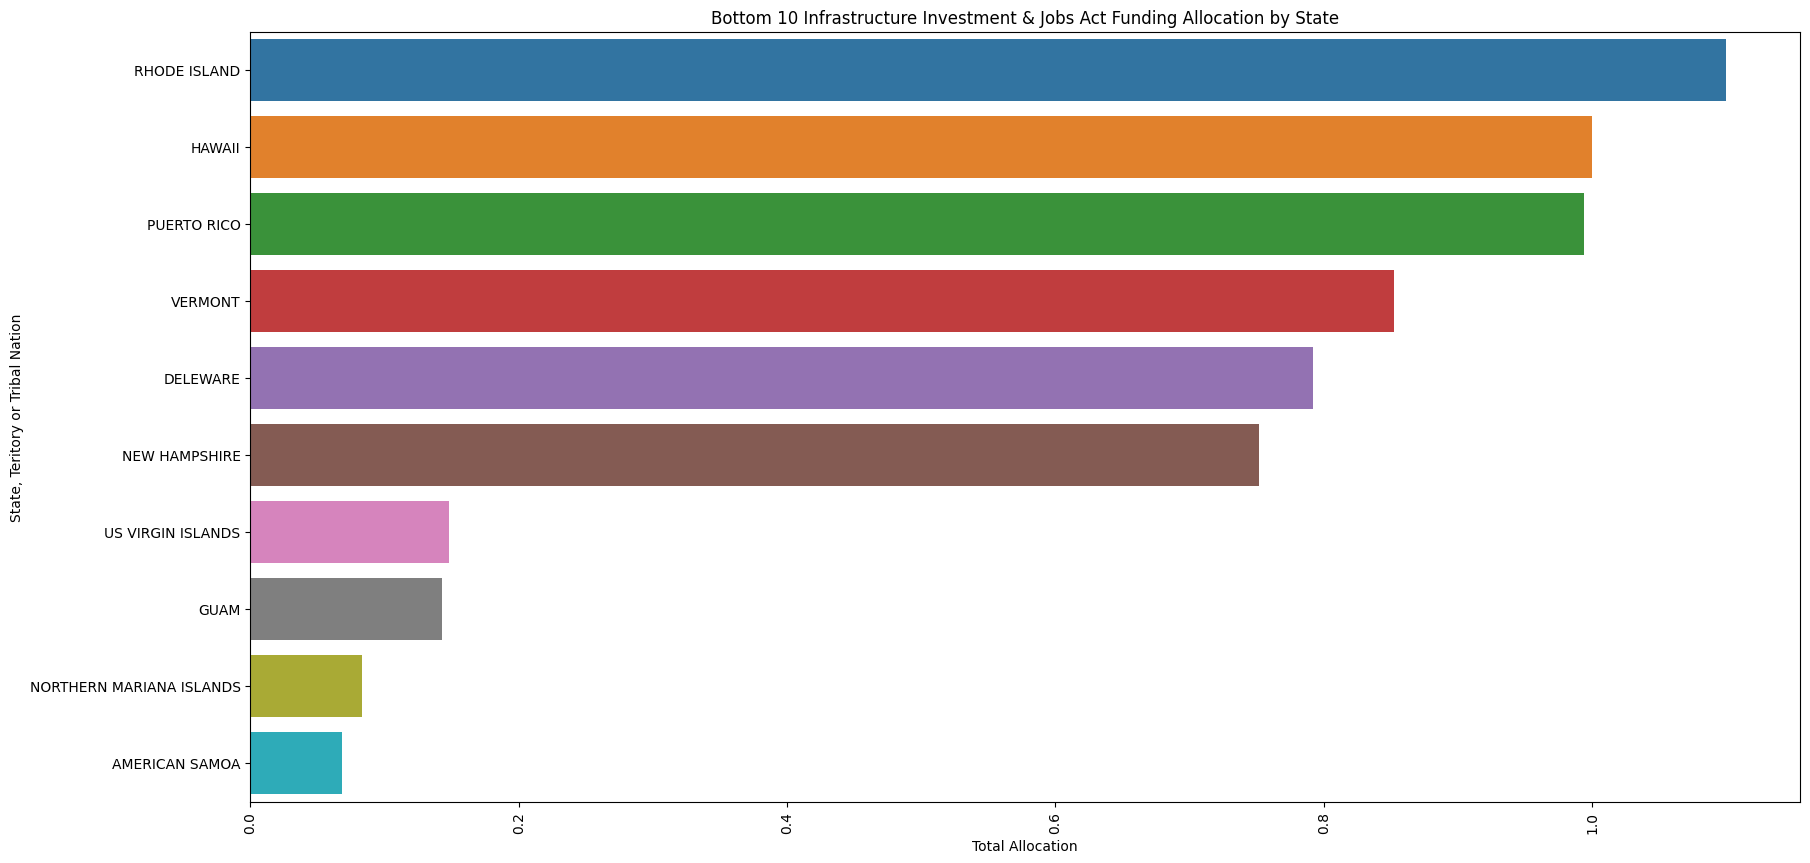

In [80]:
plt.figure(figsize=(20,10))
sns.barplot(y='State, Teritory or Tribal Nation', x='Total (Billions)', data=sorted_df.tail(10))
plt.xticks(rotation=90)
plt.title('Bottom 10 Infrastructure Investment & Jobs Act Funding Allocation by State')
plt.ylabel('State, Teritory or Tribal Nation')
plt.xlabel('Total Allocation')
plt.show()

<Figure size 1000x800 with 0 Axes>

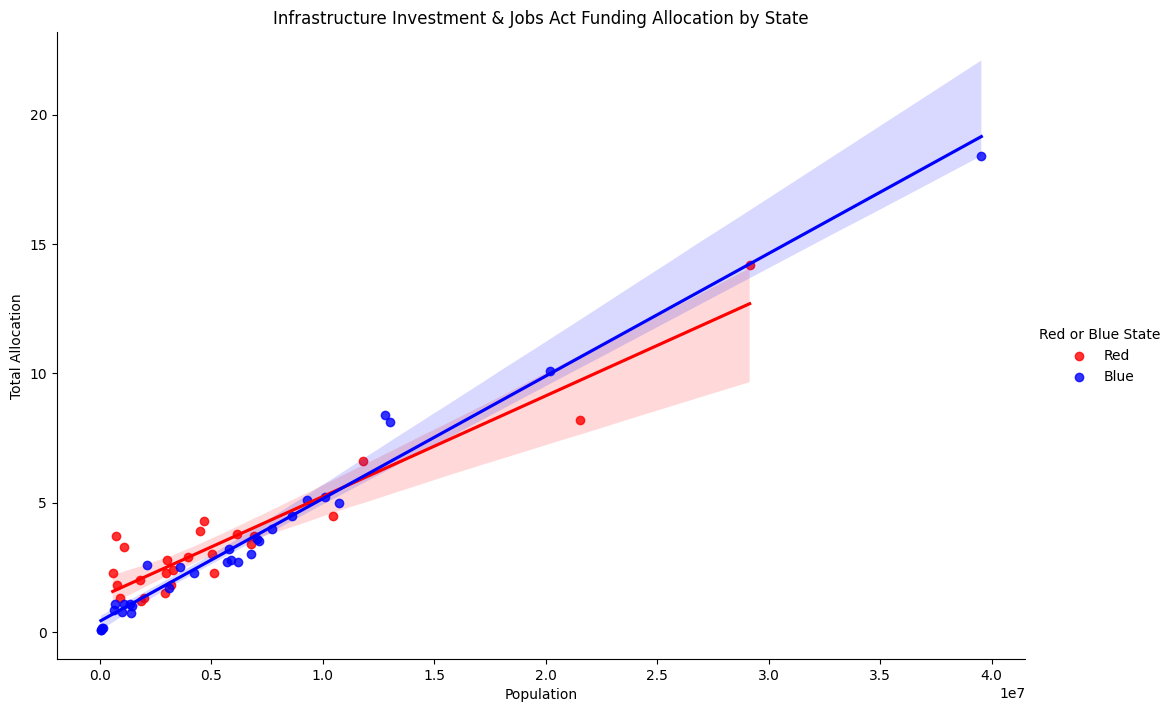

In [81]:
plt.figure(figsize=(10, 8))
sns.lmplot(x="Population", y="Total (Billions)", hue="Red or Blue State", data=merge_df, height=7, aspect=1.5,palette={"Red": "red", "Blue": "blue"})
plt.title('Infrastructure Investment & Jobs Act Funding Allocation by State')
plt.xlabel('Population')
plt.ylabel('Total Allocation')
plt.show()

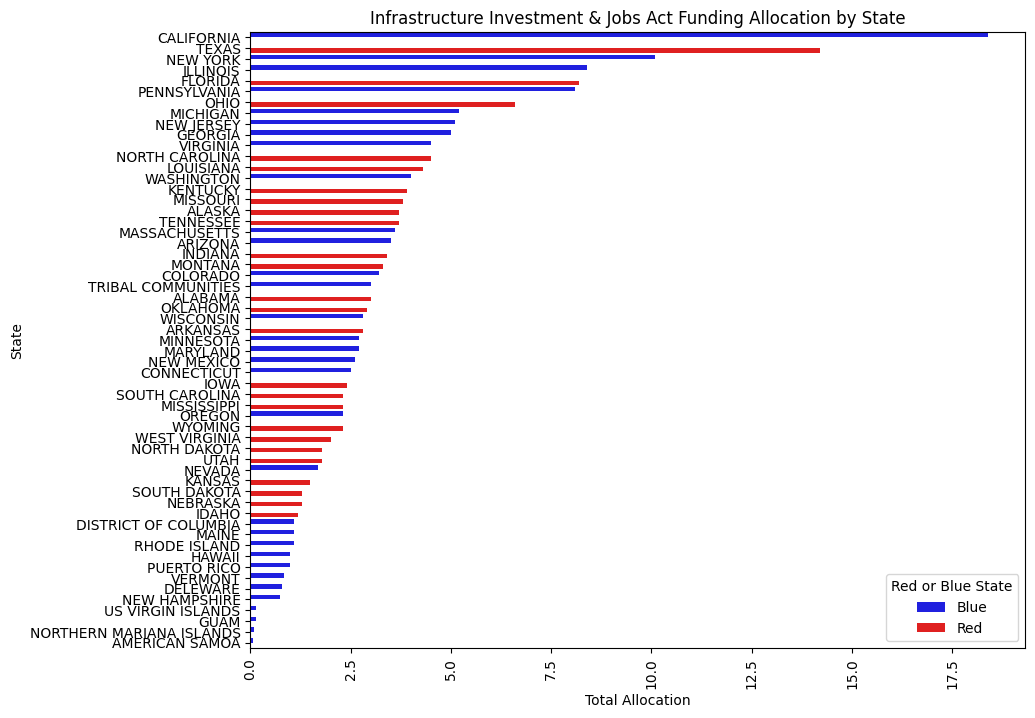

In [82]:
plt.figure(figsize=(10, 8))
sns.barplot(y="State, Teritory or Tribal Nation", x="Total (Billions)", hue="Red or Blue State", data=sorted_df,palette={"Red": "red", "Blue": "blue"})
plt.title('Infrastructure Investment & Jobs Act Funding Allocation by State')
plt.ylabel('State')
plt.xlabel('Total Allocation')
plt.xticks(rotation=90)
plt.show()

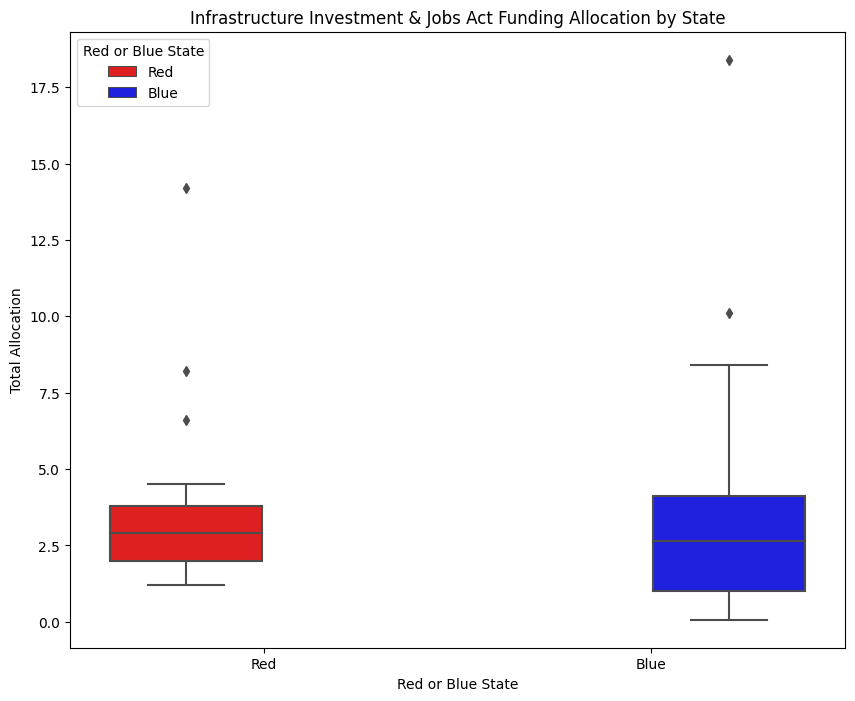

In [83]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=merge_df, x="Red or Blue State", y="Total (Billions)", hue="Red or Blue State",palette={"Red": "red", "Blue": "blue"})
plt.title('Infrastructure Investment & Jobs Act Funding Allocation by State')
plt.xlabel('Red or Blue State')
plt.ylabel('Total Allocation')
plt.show()

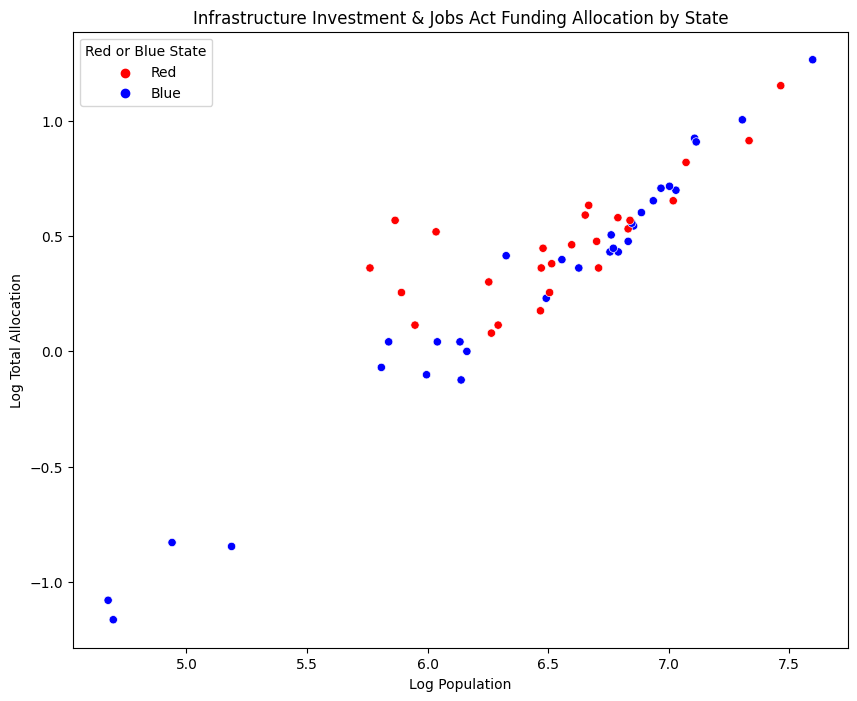

In [84]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=np.log10(merge_df['Population']), y=np.log10(merge_df['Total (Billions)']), hue="Red or Blue State", data=merge_df, palette={"Red": "red", "Blue": "blue"})
plt.title('Infrastructure Investment & Jobs Act Funding Allocation by State')
plt.xlabel('Log Population')
plt.ylabel('Log Total Allocation')
plt.show()

https://www.census.gov/quickfacts/fact/table/PR/PST045222 Puerto Rice pop

https://www.cookpolitical.com/2020-national-popular-vote-tracker 2020 voter pop
https://worldpopulationreview.com/states states pop 2023
